___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ip38LhwnKDrCjFTNgPFacQ.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ip38LhwnKDrCjFTNgPFacQ.jpeg</p>


### <font color= #2E9AFE> Tema: Reducción de dimensionalidad</font>

La **maldición de la dimensionalidad** se refiere a los problemas que ocurren cuando los datos tienen demasiadas características o dimensiones.

A medida que aumenta el número de dimensiones:

- Los datos se vuelven dispersos.
- Se vuelve más difícil encontrar patrones o relaciones a medida que se agrega más y más ruido a los datos.
- Los algoritmos se vuelven más lentos y menos precisos.

**Ejemplo:**

Digamos que queremos predecir el precio de una casa. Al inicio tenemos tres variables:
1. Tamaño de la casa
2. Número de cuartos
3. Ubicación

Con esto es fácil encontrar patrones y hacer buenas predicciones. 

Podríamos empezar a pensar en más caracteríasticas que pudieran ayudarnos a ser más precisos en nuestras predicciones, como:

- Color de las paredes
- Tipo de cortinas
- Forma de las agarraderas para abrir las puertas
- Marca del fregadero de la cocina
- Tipo de piso
- Tipos de focos
- Etc...

Ahora hemos agregado más de 30 características... Por sentido común, la mayoría de estos realmente no afectan el precio, como la marca del fregadero de la cocina, el tipo de cortinas, etc.

Entonces, no siempre es necesario que agregando más características siempre obtengamos mejores resultados.

**Qué pasa cuando más características son agregadas?**

- Es más difícil encontrar patrones que valgan la pena
- El modelo se hace más lento y puede dar peores resultados
- Necesitamos muchísima más data para entrenar el modelo

### Esto es la maldición de la dimensionalidad: demasidas características pueden perjudicar nuestros resultados

**Formas de quitar la maldición de la dimensionalidad**

1. Selección de Variables
2. Reducción de Dimensionalidad = Extracción de variables

La selección de características es diferente a la reducción de dimensionalidad. 

Ambos métodos buscan reducir la cantidad de atributos en el conjunto de datos, pero un método de reducción de dimensionalidad lo hace creando nuevas combinaciones de atributos, donde los métodos de selección de características incluyen y excluyen atributos presentes en los datos sin cambiarlos.

Ejemplos de métodos de reducción de dimensionalidad incluyen: Análisis de componentes principales y Descomposición de valores singulares.

### Principant Component Analysis 

El PCA usa álgebra lineal para transformar el conjunto de datos en una forma comprimida.

**El objetivo de PCA**

Identificar patrones, correlaciones entre variables y luego comprimir las variables en sus características más importantes para que los datos se simplifiquen sin perder información importante.

**Cómo determinar si el PCA es el mejor método para ti**

1. ¿Quieres reducir el número de variables, pero no puedes eliminar ninguna por completo?
2. Tienes demasiadas variables correlacionadas?
3. Tus datos son lineales
4. ¿Te sientes cómodo perdiendo algo de interpretabilidad de tus variables independientes?
  
Si respondió “sí” a las tres preguntas... entonces PCA es para ti.

Por cierto...el PCA se beneficia de la estandarización de los datos

In [1]:
#Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
#cargar datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X,y], axis=1)

In [3]:
df.shape

(569, 31)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Procesamiento de datos

Antes de realizar PCA, es fundamental estandarizar los datos. Esto significa centrar los datos restando la media y escalarlos dividiéndolos por la desviación estándar. La estandarización garantiza que todas las características tengan la misma importancia en el análisis.

In [5]:
#Escalar datos 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(X)

### Eligiendo el número de componentes principales

In [6]:
from sklearn.decomposition import PCA
 
#inicializar el objeto
pca = PCA()
#aplicarlo a los datos
pca_fit = pca.fit_transform(x_scaled)
 

In [7]:
#Variables transformadas (rotadas)
pd.DataFrame(pca_fit, columns=X.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,-0.175256,-0.151020,0.201503,-0.252585,0.033914,-0.045648,0.047169
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,0.011290,-0.170510,0.041129,0.181270,-0.032624,0.005687,0.001868
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,0.102762,0.171158,-0.004735,0.049569,-0.047026,-0.003146,-0.000751
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,0.153430,0.077496,0.275225,0.183462,-0.042484,0.069295,0.019937
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,-0.005332,0.003062,-0.039254,0.032168,0.034786,-0.005038,-0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,-0.006888,0.067000,-0.088590,0.107898,0.219520,0.122900,0.159198,-0.009853,-0.007119,0.001415
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,0.009802,-0.019563,0.055405,0.086135,0.001197,-0.065889,-0.068512,0.023575,0.027486,0.010419
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,0.036592,-0.063352,0.200312,-0.044819,0.002429,-0.007095,-0.023691,0.002578,-0.006706,-0.003770
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,-0.140648,0.042478,-0.168820,-0.195969,0.377830,0.198192,-0.027409,0.068086,0.084163,0.023783


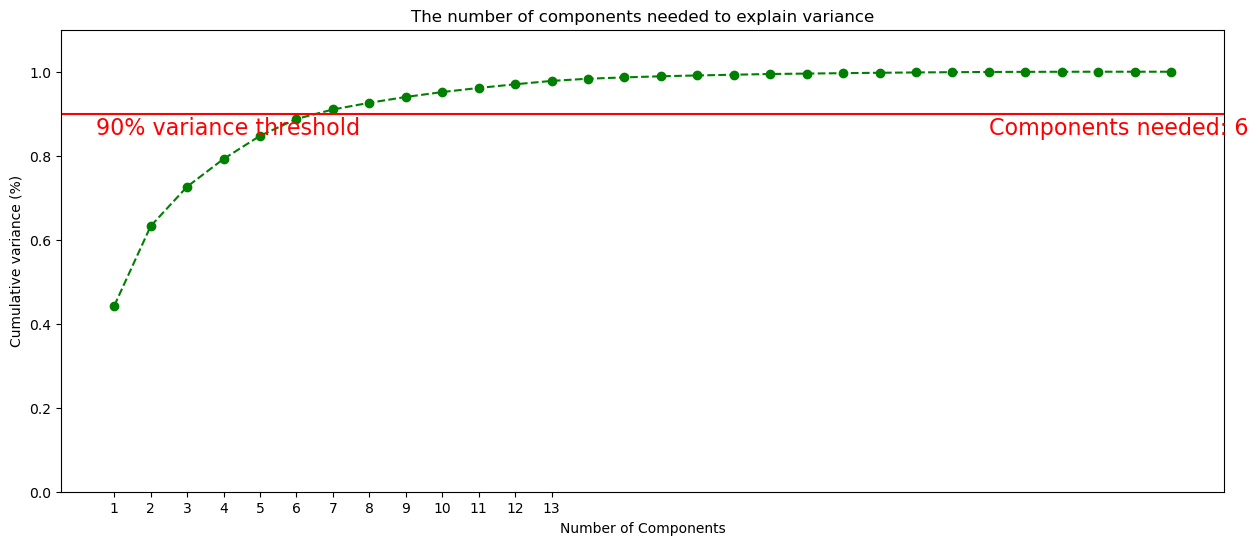

In [8]:
# Graficar la varianza acumulativa de cada componente
plt.figure(figsize = (15, 6))
components = np.arange(1, 31, step=1) 
variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% variance threshold', color = 'red', fontsize=16)
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)
plt.show()

El gráfico anterior contiene la varianza acumulada como una proporción en el eje Y y el número de componentes en el eje X.

Utilizando un umbral de variación del 90%, el gráfico anterior nos ayuda a determinar cuántos componentes debemos conservar de nuestro conjunto de datos para que siga teniendo sentido para nosotros en cualquier modelado posterior.

Tenga en cuenta que aquí elegimos el 90% como umbral de variación, pero esta no es una regla de oro. El data scientist elige este umbral de variación.

Entonces, podemos ver en este gráfico que necesitamos 6 componentes para retener el 90% de la variabilidad (información) en nuestros datos.

### Aplicando el PCA

In [9]:
from sklearn.decomposition import PCA
 
#inicializar el objeto
pca = PCA(n_components=6)
#aplicarlo a los datos
pca_fit = pca.fit_transform(x_scaled)
datos_pca = pd.DataFrame(pca_fit, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
datos_pca['y'] = y

In [10]:
datos_pca

,PC1,PC2,PC3,PC4,PC5,PC6,y
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,0
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,0
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,0
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,0
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,0
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,0
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,0
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0


In [11]:
#sin PCA
##Aplicacion de la regresion logística con datos originales
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#inicializar el objeto
logreg = LogisticRegression()
#aplicar la regresión logística a los datos
logreg.fit(x_scaled, y)

#predicciones
y_predict = logreg.predict(x_scaled)
accuracy_score(y,y_predict)


0.9876977152899824

In [12]:
##Aplicacion de la regresion logística con datos después de aplicar el PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(np.array(datos_pca[['PC1','PC2','PC3','PC4','PC5','PC6']]), y)

y_predict = logreg.predict(datos_pca[['PC1','PC2','PC3','PC4','PC5','PC6']])
accuracy_score(y,y_predict)


c:\Users\oweno\anaconda3.1\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9771528998242531

No se aumenta el accuracy con el PCA (fenómeno normal) pero sí reducimos la dimensionalidad de los datos, por lo tanto es menos carga computacional. Con menos información, el clasificador sigue dando muy buenos resultados. 


### ¿Qué algoritmos se benefician del PCA?

1. Algoritmos lineales. Ya que ayuda a reducir la multicolinealidad
    - Regresión logística
    - Regresión Lineal
2. Máquinas de vector soporte
3. Algoritmos de clustering
4. Redes neuronales

Más información sobre el PCA:

https://towardsdatascience.com/the-most-gentle-introduction-to-principal-component-analysis-9ffae371e93b#:~:text=From%20Wikipedia%2C%20PCA%20is%20a,find%20unmeasured%20%E2%80%9Clatent%20variables%E2%80%9D.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>